# INFO 370 Problem Set 4: Descriptive Statistics
*Name:* Israel Martinez

## 1 Explore Central Limit Theorem (60pt)
In this section you will see how does Central Limit Theorem (CLT) work. CLT states
two things:
1. Means of random numbers tend to be normally distributed if the sample gets large.
2. Variance of the mean tends to be 1 SVar X where S is the sample size and X is the random variable we are analyzing.

    (This is actually a direct result of definition of expectation, and independence not really CLT. But CLT is closely related to this result.)

CLT, and how variance and mean value change when sample size increases, plays a very important role in computing confidence intervals later.

The problem contains two tasks: work with Bernoulli-distributed numbers (discrete distribution), and with Pareto-distributed numbers (continuous distribution).

The task is structured in a way that you may want to create a function that takes in sample size S and outputs all needed results, including the histogram. There will be quite a bit of repetitive coding otherwise.

### 1.1 Discrete Random Variables (36pt)
We start with a distribution that does not look at all normal. We create a RV

X = { −1 with probability 0.5
    { 1 with probability 0.5.

One way to sample such realizations is
np.random.randint(0,2, size=100) * 2 - 1

1. (5pt) Calculate the expected value and variance of this random variable. Note: these are theoretical values and not related to any samples.

Hint: read lecture notes 1.3.4 (Expected Value and Variance), and Openintro Statistics 3.4 (Random variables), in particular 3.4.2 (Variability). I recommend to use the shortcut formula 

Var X = E X^2 − (E X)^2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [4]:
x = np.random.randint(0, 2, size = 100) * 2 - 1
v = np.var(x)
v

0.9900000000000001

The expected value of the random variable will be 0, while the variance will be 0.99.

2. (1pt) Choose your number of repetitions R. 1000 is a good number but you can also take 10,000 or 100,000 to get smoother histograms.

Note: number of repetitions R is not the same as sample size S here. You will create samples of size S for R times. For instance you create R = 1000 times a sample of size S = 5. Please understand the difference, it is a fequent source of confusion!

In [17]:
R = 1000

3. (2pt) Create a vector of R random realizations of X. Make a histogram of those. Comment the shape of the histogram.

Note: in this case we have R = 1000 repetitions and samples of size S = 1–we look at individual realizations.

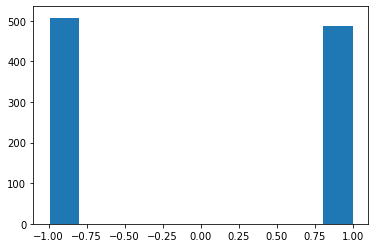

In [10]:
S = 1
x = np.random.randint(0, 2, size=(R, S)) * 2 - 1
m = np.mean(x, axis=1)
_ = plt.hist(x, edgecolor = 'w')

4. (4pt) Compute and report mean and variance of the sample you created (just use np.mean and np.var). Compare these numbers with the theoretical values computed in 1.

In [11]:
mean = np.mean(x)
var = np.var(x)
mean, var

(-0.02, 0.9995999999999999)

The mean is -0.02 and the variance is 0.9995999999999999.

5. (3pt) Now create R pairs of random realizations of X (i.e. sample size S = 2). For each pair, compute its mean. You should have R means. Make the histogram. How does this look like?

Hint: while you can do this using loops, it is more useful to create a R × 2 matrix of realizations of X, where each row represents one pair. Thereafter you compute means by rows and you have R pair means. See python notes numpy statistical functions for an example.

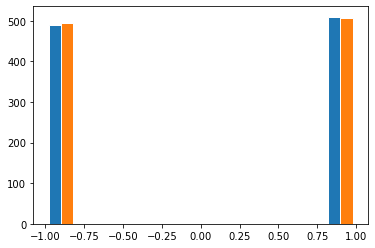

In [14]:
S = 2
x = np.random.randint(0, 2, size=(R, S)) * 2 - 1
_ = plt.hist(x, edgecolor = 'w')

6. (3pt) Compute and report mean of the R pair means, and variance of the means.

7. (5pt) Compute the expected value and variance of the pair means, i.e. the theoretical concepts. Compare the theoretical values with the sample values above.

Note that according to CLT tells, the variance of a pair mean should be just 1/2 of what you got above as for pairs S = 2.

In [16]:
mean = np.mean(x)
var = np.var(x)
mean, var

(0.016, 0.9997440000000002)

The mean is 0.016 and the variance is 0.9997440000000002.

8. (2pt) Now instead of pairs of random numbers, repeat this with 5-tuples of random numbers (i.e. S = 5 random numbers per one repetition, and still R = 1000 repetitions in total). Compare the theoretical and sample version of mean and variance of 5-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?

(0.004000000000000002, 0.20862399999999998)

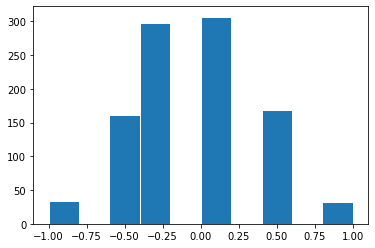

In [19]:
S = 5
x = np.random.randint(0, 2, size=(R,S)) * 2 - 1
m = x.mean(axis=1)
mean = np.mean(m)
var = np.var(m)
_ = plt.hist(m, edgecolor='w')
mean, var

The mean is 0.004000000000000002 and the variance is 0.20862399999999998. Compared to the previous histogram, there is a lot more variety in data. The mean is a lot closer to 0 and the variance value is much more.

9. (2pt) Repeat with 25-tuples...

(-0.003120000000000001, 0.0414110656)

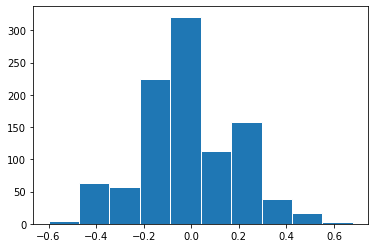

In [23]:
S = 25
x = np.random.randint(0, 2, size=(R,S)) * 2 - 1
m = x.mean(axis=1)
mean = np.mean(m)
var = np.var(m)
_ = plt.hist(m, edgecolor='w')
mean, var

10. (2pt) ... and with 1000-tuples.

(0.001094, 0.0009420231639999999)

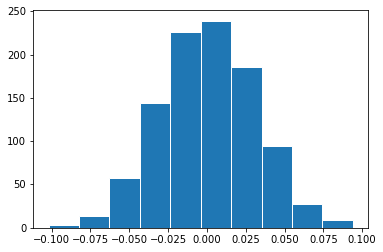

In [24]:
S = 1000
x = np.random.randint(0, 2, size=(R,S)) * 2 - 1
m = x.mean(axis=1)
mean = np.mean(m)
var = np.var(m)
_ = plt.hist(m, edgecolor='w')
mean, var

11. (3pt) Comment on the tuple size, and the shape of the histogram.

As the sample size is increased, the graph seems to become more and more normally distributed. According to CLT, as our sample gets bigger then approach the expected value of 0. Another thing to think about is that the mean values got closer to 0 which showed that the results were averaging.

12. (4pt) Explain why do the histograms resemble normal distribution as S grows.

In particular, explain what happens when we move from single values S = 1 to pairs S = 2. Why did two equal peaks turn into a “山”-like histogram?

The sample size was doubled, going from 1 to 2.

### 1.2 Pareto-distributed Random Numbers (24pt)
Next, we look at Pareto-distributed random numbers.1 Pareto is a popular distribution to describe unequal outcomes, such as human income. It has a single parameter α, often called shape. Its pdf is given as

f(x) = α(1 + x)^(−α−1)

Its expected value (mean) can be compute by just integrating the pdf but we just rely on the formulas:

E X = 1 / (α − 1), α > 1

for expected value and

Var X = α / (α − 1)^2(α − 2), α > 2

for variance. You will encounter pareto-distributed data again and again, so let’s get a little familiar with it.

First let’s generate random numbers from this distribution.

1. (4pt) Create a vector of R pareto(5) random numbers. Make a histogram of those.

Comment the shape of the histogram.

Note: We choose the parameter α = 5 as Pareto gets nasty as α gets too small (α ⩽ 2).
We just want to steer away from those troubles.

Hint: use np.random.pareto(5, size) to create such numbers.

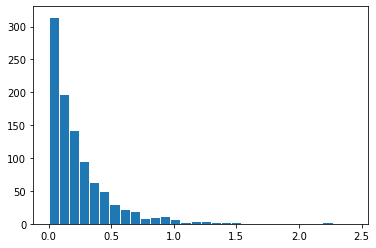

In [29]:
p = np.random.pareto(5, size=R)
_ = plt.hist(p, bins=30, edgecolor='w')

2. (3pt) Compute and report mean and variance of the sample you created (just use np.mean and np.var). Compare these numbers with the theoretical values computed from (2) and (3).

Hint: these should be similar

In [30]:
p_mean = np.mean(p)
p_var = np.var(p)
p_mean, p_var

(0.25287695759689277, 0.09272152790644844)

The mean of the Pareto numbers is 0.25287695759689277 and the variance is 0.09272152790644844. It appears like the graph is cutting in half each time.

3. (3pt) Now create R pairs of random Paretos. For each pair, compute its mean. You should have R means. Make the histogram. How does this look like?

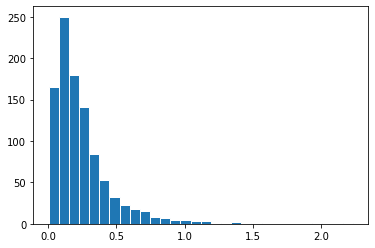

In [31]:
p2 = np.random.pareto(5, size=(R, 2))
p2_mean = p2.mean(axis=1)
_ = plt.hist(p2_mean, bins=30, edgecolor='w')

4. (4pt) Compute and report mean of the pair means, and variance of the means.

5. (5pt) Compute theoretical mean and variance of pair means using (2), (3), and CLT. Remember, the variance now should be just 1/2 of what (3) suggests as size of the pairs S = 2. Compare these numbers with the sample versions.

Hint: your experimental results should be similar to the theoretical ones

In [32]:
p2_means = np.mean(p2_mean)
p2_var = np.var(p2_mean)
p2_means, p2_var

(0.2469051304576721, 0.052224286525996436)

The Pareto data's mean is 0.2469051304576721 and the variance is 0.052224286525996436. The graph is not cutting in half each one and it starts to move toward center.

6. (1pt) Now repeat this with 5-tuples of random numbers. Do you spot any noticeable differences in the histogram?

(0.2521067444291397, 0.021161437133666857)

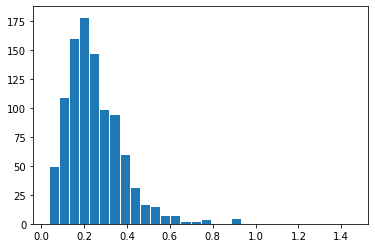

In [37]:
p3 = np.random.pareto(5, size = (R,5))
p3_mean = p3.mean(axis = 1)
p3_means = np.mean(p3_mean)
p3_var = np.var(p3_mean)
_ = plt.hist(p3_mean, bins = 30, edgecolor='w')
p3_means, p3_var

The Pareto data's mean is 0.2521067444291397 and the variance is 0.021161437133666857. The graph seems like it is somewhat shifting because the most common results are toward the middle.

7. (1pt) Repeat with 25-tuples...

(0.2521067444291397, 0.021161437133666857)

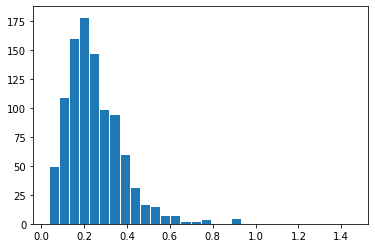

In [38]:
p4 = np.random.pareto(5, size = (R,25))
p4_mean = p3.mean(axis = 1)
p4_means = np.mean(p4_mean)
p4_var = np.var(p4_mean)
_ = plt.hist(p4_mean, bins = 30, edgecolor='w')
p4_means, p4_var

The mean is 0.2521067444291397 and the variance is 0.021161437133666857.

8. (1pt) ... and with 1000-tuples

(0.2501480570632467, 9.812387094132627e-05)

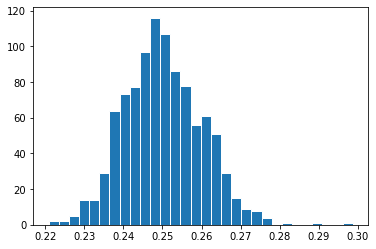

In [39]:
p5 = np.random.pareto(5, size = (R,1000))
p5_mean = p5.mean(axis = 1)
p5_means = np.mean(p5_mean)
p5_var = np.var(p5_mean)
_ = plt.hist(p5_mean, bins = 30, edgecolor='w')
p5_means, p5_var

The mean is 0.2501480570632467 and the variance is 9.812387094132627e-05.

9. (2pt) Comment on the tuple size, and the shape of the histogram.

Hint: consult Openintro Statistics 5.1.3 (p 172-178).

As the sample size in the data got bigger, the shape of the histogram took an obvious shift twoard bell curve shapes, with more common values centered in the middle of the graph.

## 2 Global temperature over time (40pt)
In this question you will to work with satellite-based global temperature records. There is quite a bit of debate about how satellite records relate to the actual near-ground temperature, here we simply say that we talk about “lower troposphere temperature”, whatever it means. You can download the original dataset from University of Alabama, Huntsville
http://vortex.nsstc.uah.edu/data/msu/v6.0/tlt/uahncdc_lt_6.0.txt, on the version on canvas we have done a little bit of cleaning.

The variables are:
Year
Mo month - 1..12

the area of measurement: Globe, NH = north hemisphere, Land = NH land, Ocean = NH ocean, SH = south hemisphere, Trpcs = tropics, NoExt = northern areas outside tropics, SoExt, NoPol = northern polar areas, etc. There are separate figures for land and sea

temp - Temperature, deg C deviation from 1991-2020 average. 

Global warming is thought to bring both higher temperatures but also more extreme weather. Can we see this in the data? Your task is to answer two questions:

a) Do we observe a trend in the global temperature over time in this data?

b) Do we observe a trend in the temporal variability of the global temperature in this data?

We base our conclusions on plots and visual inspection only, we do not compute any time trends and confidence values.

1. (5pt) Are these variables of such a measure type that permit to ask/answer such a question?

Hint: read Lecture notes http://faculty.washington.edu/otoomet/machineLearning.pdf Section 1.1.1 “Measures: Possible Mathematical Operations”


We can possibly use means temp variable and intervals from the years to see the change in trends. However, Ott says the temperature values in this sense are not comparable in the same way.... Degrees
of Celsius are based on the temperature of the freezing point of water, and from the climate perspective, it is an arbitrary reference point" (3). Looking at the means, medians, and modes might be helpful if we look at each year overtime, but it wouldn't help to look at it from all the data.

2. (2pt) Load the data. Perform basic sanity checks. Note: the data is whitespace separated. you can load it like

In [41]:
lt = pd.read_csv("./data/UAH-lower-troposphere_wide.csv.bz2", delim_whitespace = True)
lt.head()

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29
1,1979,1,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.15,-0.15,-0.16,-3.22,-2.42,0.92
2,1979,2,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-0.36,-2.00,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30
3,1979,3,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.21,-0.56,-0.47,-0.65,-0.52,-1.25,-0.18,-0.70,-0.39,0.23
4,1979,4,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.31,-0.84,-0.81,-0.87,-0.26,0.26,-0.51,-0.72,-0.46,-1.12


In [43]:
lt.shape

(511, 29)

3. (5pt) Make a simple plot to address the first question–the temperature trend. Which variables do you want to plot? Comment the result: what, if anything, does the figure suggest?

Hint: you may need a variable for time along the lines time = year + month/12

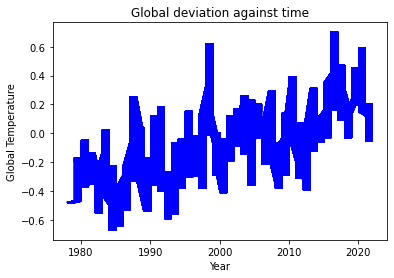

In [44]:
years = [] 
for value in lt.Year: 
    time = (lt.Mo / 12) + value
    years.append(time)

plt.plot(years, lt.Globe, color = 'blue')
plt.title('Global deviation against time')
plt.xlabel('Year')
plt.ylabel('Global Temperature')
plt.show()    

4. (6pt) However, for each month we have a single global temperature reading so we cannot compute the monthly variance. Instead, let’s compute yearly variance, and make a plot where years are on the horizontal axis and temperature variance on the vertical axis.

Hint: use groupby by years.

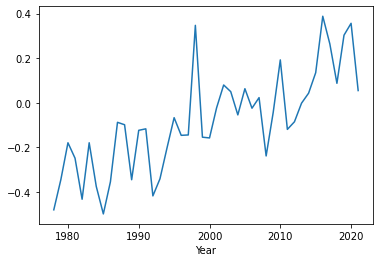

In [53]:
compute_yrly = lt.groupby("Year").Globe.mean()
_ = compute_yrly.plot.line()

5. (5pt) In order to be consistent, let’s do the same with temperature: compute yearly temperature and repeat the plot with yearly averages. 

But what is “yearly temperature”? Do you prefer yearly mean temperature? Or perhaps yearly median? Discuss the advantages/disadvantages of these measures and pick an
appropriate measure. You may also display both.

Hint: Lecture notes http://faculty.washington.edu/otoomet/machineLearning.
pdf Section 1.2.2 “Doing descriptive statistics” discusses mean and median.

6. (6pt) Finally, let’s also make similar plots using decades instead of years.

Hint: create a decade variable using year and integer division //.

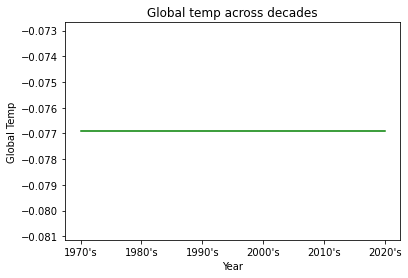

In [49]:
y70s = []
y80s = []
y90s = []
y00s = []
y10s = []
y20s = []
for y in lt.Year:
    val = y // 10 % 10
    if (val == 7):
        y70s.append(lt.Globe)
    if (val == 8):
        y80s.append(lt.Globe)
    if (val == 9):
        y90s.append(lt.Globe)
    if (val == 0):
        y00s.append(lt.Globe)
    if (val == 1):
        y10s.append(lt.Globe)
    if (val == 2):
        y20s.append(lt.Globe)
m70s = np.mean(y70s)
m80s = np.mean(y80s)
m90s = np.mean(y90s)
m00s = np.mean(y00s)
m10s = np.mean(y10s)
m20s = np.mean(y20s)
dec_avg = [m70s, m80s, m90s, m00s, m10s, m20s]
year = ["1970's", "1980's", "1990's", "2000's", "2010's", "2020's"]
plt.plot(year, dec_avg, color = 'green')
plt.title('Global temp across decades')
plt.xlabel('Year')
plt.ylabel('Global Temp')
plt.show() 

7. (5pt) In your decadal plot: what do you think about data quality of 1970s and 2020s?

Hint: how many observations are there?

For the 1970's I took the average within the year to not mess up the data. The 70's graph only had part of 1978 and 1979, and 2020 only has part of 2020 and 2021, which means its important to remember it might throw the graph off. However, the averages were close and the line looks flat. Overall, the Global Temp across yearly temp averages makes the most sense. Rather grouping it by year makes the data much cleaner.

8. (6pt) Discuss all your plots and state your conclusions: do you see any temperature trend? Do you see any trend in temporal variability? Which plots do you think illustrate your claims in the best way?

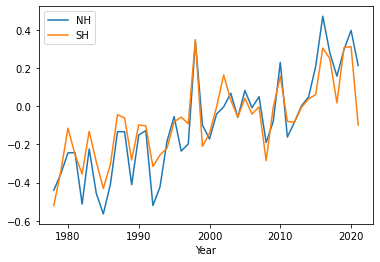

In [52]:
nh = lt.groupby("Year").NH.mean()
sh = lt.groupby("Year").SH.mean()
hemi = pd.DataFrame({"NH": nh, "SH": sh})
_ = hemi.plot.line()

The trend of the temp increases and decreases are very similar. Since the 2010's we can see the Northern Hemisphere is increasing more, which means its been getting warmer over time. It deviates much more than the southern hemisphere does. This may be because more people live in the northern hemisphere, which means more likelihood of human activities causing climate change effects.

How much time did you spend on this PS?

6-7 hours.